# Superstore Data Analytics

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import & Merge Data

In [40]:
orders = pd.read_csv('data/orders.csv')
orders = orders.drop(['Row ID'],axis=1)
print(orders.shape)
orders.head()

(9994, 20)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [41]:
returns = pd.read_csv('data/returns.csv')
print(returns.shape)
returns.head()

(296, 2)


,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [42]:
## Merge returns to orders based on Order ID
df = orders.merge(returns,how='left',on='Order ID')
print(df.shape)
df.head()

(9994, 21)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN


In [43]:
## Fill all empty values on Returned with No (i.e. Order ID was not on returns)
df.Returned = df.Returned.fillna('No')
df.Returned.unique()

array(['No', 'Yes'], dtype=object)

## Data Summary & Aggregation

In [44]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Returned'],
      dtype='object')

In [45]:
## Drop columns that we do not need for analysis or that are redundant
df = df.drop(['Order ID','Customer ID','City','Postal Code','Product ID','Country'],axis=1)
print(df.columns)

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Returned'],
      dtype='object')


In [46]:
## Convert date columns to date datatypes on pandas
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
## Compute number of days for shipping as a new column and drop shipping date
df['Shipping Days'] = df['Ship Date'] - df['Order Date']
df = df.drop(['Ship Date'],axis=1)
df.columns

Index(['Order Date', 'Ship Mode', 'Customer Name', 'Segment', 'State',
       'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Returned', 'Shipping Days'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Order Date     9994 non-null   datetime64[ns] 
 1   Ship Mode      9994 non-null   object         
 2   Customer Name  9994 non-null   object         
 3   Segment        9994 non-null   object         
 4   State          9994 non-null   object         
 5   Region         9994 non-null   object         
 6   Category       9994 non-null   object         
 7   Sub-Category   9994 non-null   object         
 8   Product Name   9994 non-null   object         
 9   Sales          9994 non-null   float64        
 10  Quantity       9994 non-null   int64          
 11  Discount       9994 non-null   float64        
 12  Profit         9994 non-null   float64        
 13  Returned       9994 non-null   object         
 14  Shipping Days  9994 non-null   timedelta64[ns]
dtypes: d

In [48]:
df.describe()

,Order Date,Sales,Quantity,Discount,Profit,Shipping Days
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994
mean,2016-04-30 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896,3 days 22:59:46.311787072
min,2014-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00
25%,2015-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750,3 days 00:00:00
50%,2016-06-26 00:00:00,54.490000,3.000000,0.200000,8.666500,4 days 00:00:00
75%,2017-05-14 00:00:00,209.940000,5.000000,0.200000,29.364000,5 days 00:00:00
max,2017-12-30 00:00:00,22638.480000,14.000000,0.800000,8399.976000,7 days 00:00:00
std,NaN,623.245101,2.225110,0.206452,234.260108,1 days 17:56:29.766161104


## Exploratory Data Analysis

### Exploring Sales (Filter Returns)
1. Sales per Month (Based on Order Date)
2. Sales per Region
3. Sales per State
4. Sales per Product Category
5. Sales vs Discounts
6. Sales vs Profits
7. Sales vs Quantity

#### Sales per Month (based on Order Date)

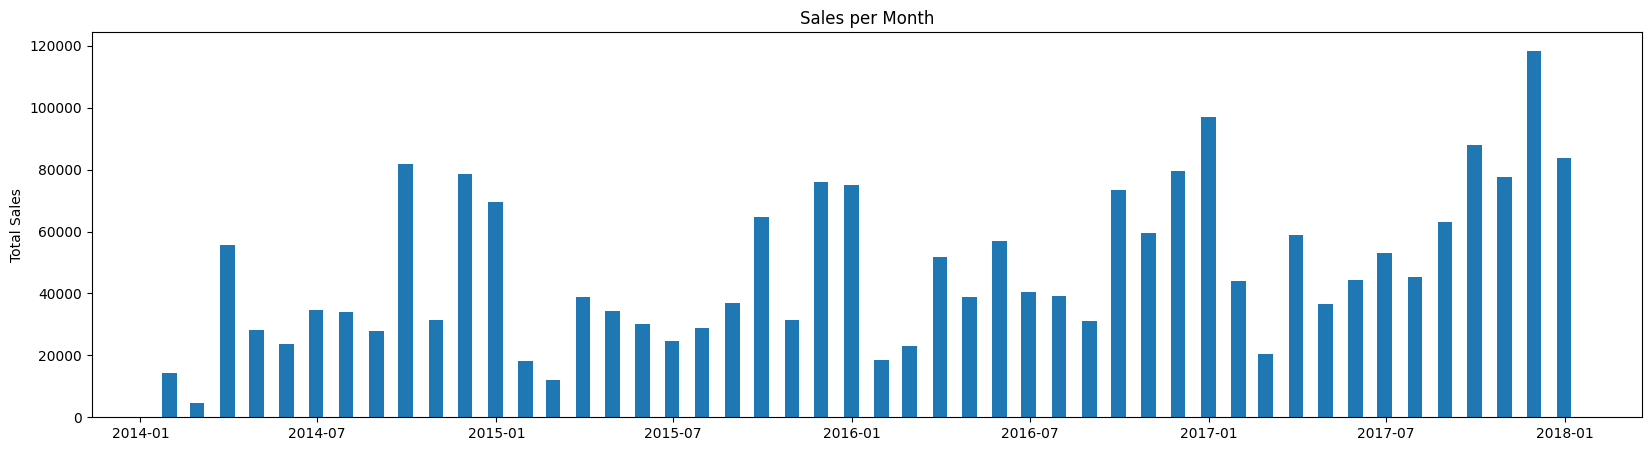

In [59]:
## Group by month and visualise sales per month
sales = df[['Sales','Order Date']].groupby(pd.Grouper(key='Order Date', axis=0, freq='M')).sum()
sales = sales.reset_index()

plt.figure(figsize=(20,5))
plt.bar(sales['Order Date'],sales['Sales'],width=15)
plt.title('Sales per Month')
plt.ylabel('Total Sales')
plt.show()

### Exploring Shipment
1. Shipment Class Distribution
2. Shipment Days by Shipment Class
3. Sales by Shipment Class